# Relatório de Análise

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [3]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


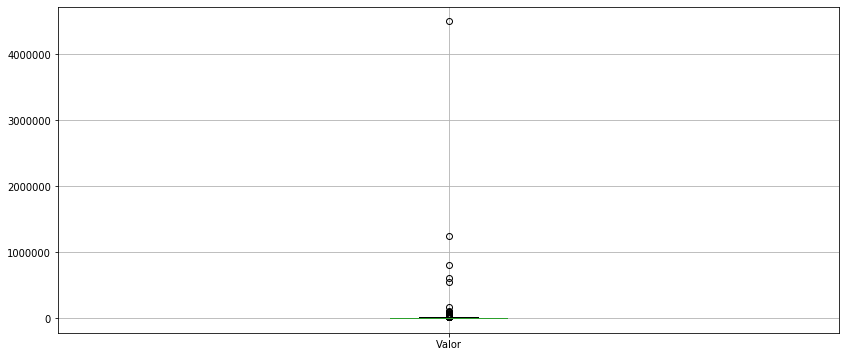

In [4]:
dados.boxplot(['Valor'])

In [5]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [6]:
valor = dados['Valor']

In [7]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [8]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

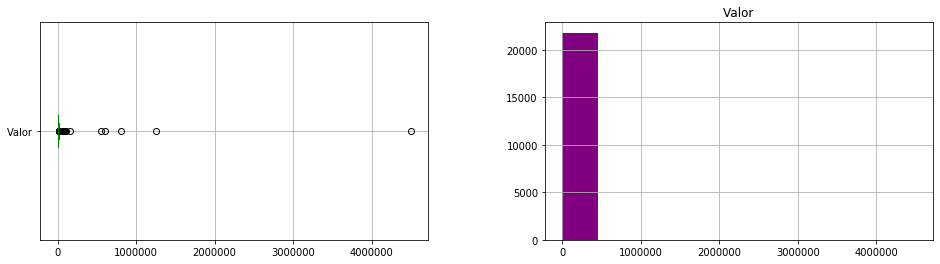

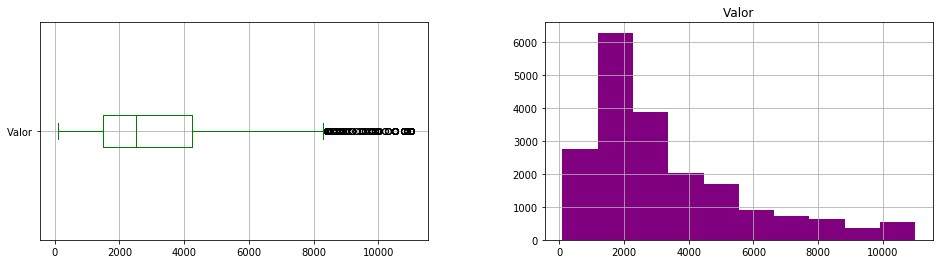

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
dados.boxplot(['Valor'], ax = ax1, vert = False, color = 'green')
dados.hist(['Valor'], ax = ax2, color = 'purple')

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
dados_new.boxplot(['Valor'], ax = ax1, vert = False, color = 'green')
dados_new.hist(['Valor'], ax = ax2,color = 'purple')
plt.show()

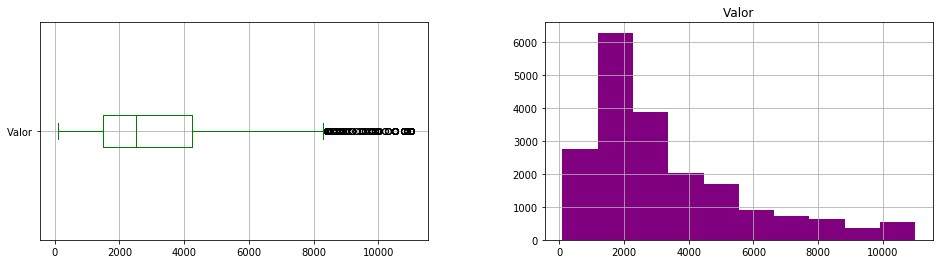

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
dados_new.boxplot(['Valor'], ax = ax1, vert = False, color = 'green')
dados_new.hist(['Valor'], ax = ax2,color = 'purple')
plt.show()

#### Quando fazemos o tratamento considerando a base de dados sem agrupamentos, eliminamos os outliers sem fazer a distinção por grupos. Na prática isto não é o mais adequado, pois podem existir imóveis de alto padrão e com valor de aluguel elevado, que estão sendo eliminados de maneira errônea na nossa abordadem inicial.

## Construindo o boxplot por tipo de imóvel, temos o seguinte:

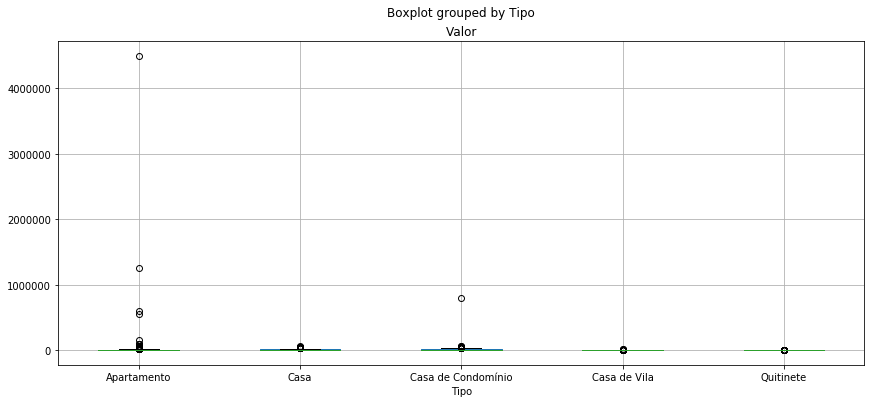

In [11]:
dados.boxplot(['Valor'], by='Tipo')

## Agrupando por tipo:

In [12]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [13]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

## Construindo os parâmetros para abordagem do intervalo interquartil (IIQ)

In [14]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [15]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

### Agora precisamos iterar por cada tipo da lista grupo_tipo e construir os limites para cada grupo:

In [16]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

### Plotando o boxplot de valor por tipo de imóvel:

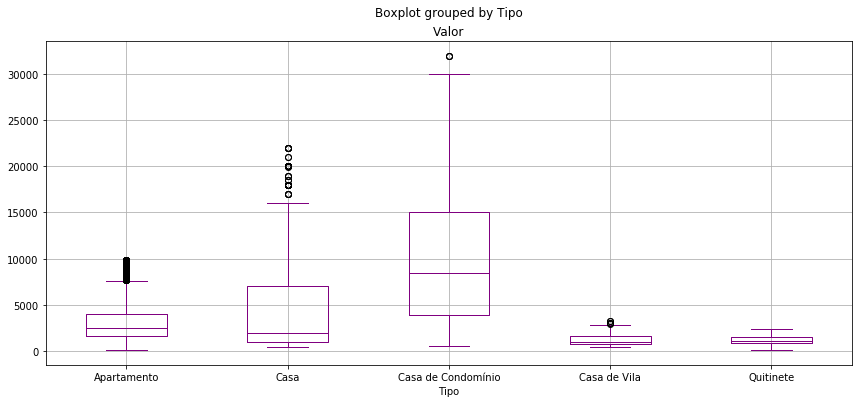

In [17]:
dados_new.boxplot(['Valor'], by='Tipo', color = 'purple')
plt.show()

### Plotando o antes e depois:

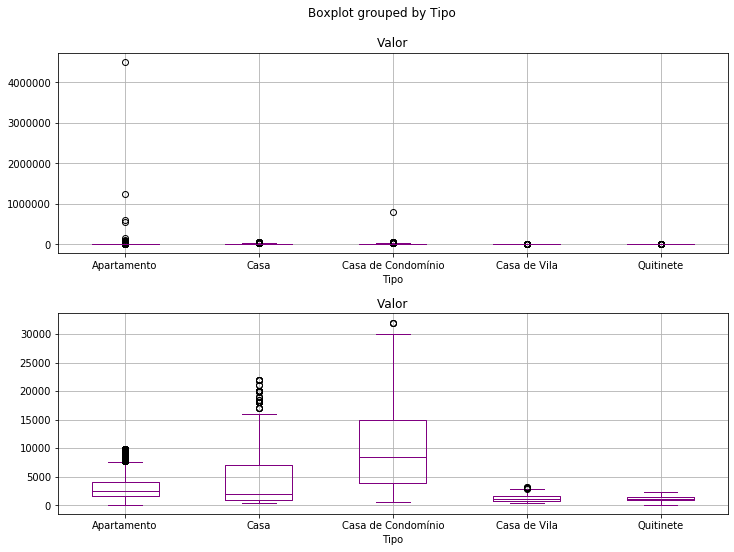

In [37]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12,8))
dados.boxplot(['Valor'], by='Tipo', ax=ax1, color = 'purple')
dados_new.boxplot(['Valor'], by='Tipo', ax=ax2, color = 'purple')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)
plt.show()

In [39]:
fig.savefig('box_grupamentos.png', dpi = 300, bbox_inches = 'tight')

#### Agora temos o limite próximo dos 32000, que antes na abordagem geral estava em torno dos 11 mil. O agrupamento por tipo é muito importante nesse tipo de análises, pois leva em consideração características específicas de cada tipo de residência. Parece coerente que tenhamos um aluguel de 32000 referente a uma casa de alto padrão, porém seria muito estranho esse valor para moradias do tipo Quitenete por exemplo.